#### Explore Optical Chemical Structure Understanding with Mol-VL

Mol-VL is an end-to-end VLM for OCSU. Here we provide an example. Approximately 20GB GPU Memory is required to load Mol-VL-7B.

Feel free to download our trained model Mol-VL-2B and Mol-VL-7B. Put them under `ckpts` and explore optical chemical structure understanding!


In [ ]:
# Change working directory
import os
import sys
parent = os.path.dirname(os.path.abspath(''))
print(parent)
sys.path.append(parent)
os.chdir(parent)

You can initialize a agent via API.

> API service: `CUDA_VISIBLE_DEVICES=0 API_PORT=8000 llamafactory-cli api onfig/inference/mol-vl_7b.yaml`

In [6]:
from PIL import Image
from pprint import pprint
from scripts.utils import AgentOCSU

agent = AgentOCSU("http://localhost:8000/v1")

[API Ready] http://localhost:8000/v1


Give a molecular image `IMG_PATH`, and the predictions can be obtained via `agent.analyze`.
We also provide a visualization tool. The predicted SMILES and Functional Groups are visualized and saved in `VIS_PATH`.

[TASK] SMILES...
[TASK] IUPAC...
[TASK] Functional Groups...
[TASK] General Caption...


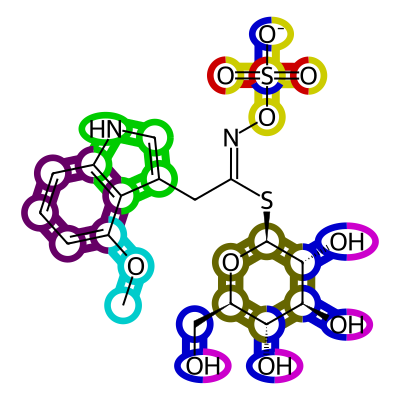

{'Functional Groups': ['alcohol groups',
                       'sulfonic acid',
                       'methoxy',
                       'side-chain hydroxyls',
                       'side-chain aldehydes',
                       'pyrrole',
                       'benzene',
                       'oxane'],
 'General Caption': 'The molecule is an indolylmethylglucosinolate that is '
                    'glucobrassicin bearing a methoxy substituent at position '
                    '4 on the indole ring. It is an indolylmethylglucosinolate '
                    'and an aryl sulfamate oxoanion. It derives from a '
                    'glucobrassicin. It is a conjugate base of a '
                    '4-methoxyglucobrassicin.',
 'IUPAC': '[(2S,3R,4S,5S,6R)-3,4,5-trihydroxy-6-(hydroxymethyl)oxan-2-yl] '
          '(1E)-2-(4-methoxy-1H-indol-3-yl)-N-sulfonatooxyethanimidothioate',
 'SMILES': 'COC1=CC=CC2=C1C(=CN2)C/C(=N/OS(=O)(=O)[O-])/S[C@H]3[C@@H]([C@H]([C@@H]([C@H](O3)CO)O)O)O'}


In [7]:
IMG_PATH = "imgs/demo.png"
VIS_PATH = "imgs/demo_mol-vl_7b_pred.png"

res = agent.analyze(IMG_PATH, VIS_PATH, size=[400,400])
img = Image.open(VIS_PATH)
img.show()

pprint (res)